<a href="https://colab.research.google.com/github/princetech89/Real-time-Credit-Card-Fraud-Detection/blob/main/fraud_detection_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/default of credit card clients(Data).csv")

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Renaming Target Column

In [8]:
df.rename(columns={'default payment next month':'default'}, inplace=True)

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Drop id columns it didnt help to Predicite future insights.

In [10]:
df.drop(columns=['ID'],inplace=True)

In [11]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Fixing Categorical columns sex,Eduction,Marriage

In [12]:
# Fix invalid categories
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)   # Others
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)            # Others


In [13]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Fix Categorical Columns

In [14]:
# Fix invalid categories
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)   # Others
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)            # Others

# Convert to categorical
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
df[cat_cols] = df[cat_cols].astype('category')

In [15]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Scale Financial Amount Features

In [16]:
from sklearn.preprocessing import StandardScaler

amount_cols = [col for col in df.columns if 'AMT' in col or col == 'LIMIT_BAL']

scaler = StandardScaler()
df[amount_cols] = scaler.fit_transform(df[amount_cols])


In [17]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,-1.136720,2,2,1,24,2,2,-1,-1,-2,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,2,2,2,26,-1,2,0,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,2,2,2,34,0,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,2,2,1,37,0,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,1,2,1,57,-1,0,-1,0,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


EDA AFTER CLEANING (CLASS-WISE BEHAVIOR)

In [18]:
df['default'].value_counts(normalize=True)

,proportion
default,
0,0.7788
1,0.2212


Visualize Class Imbalance

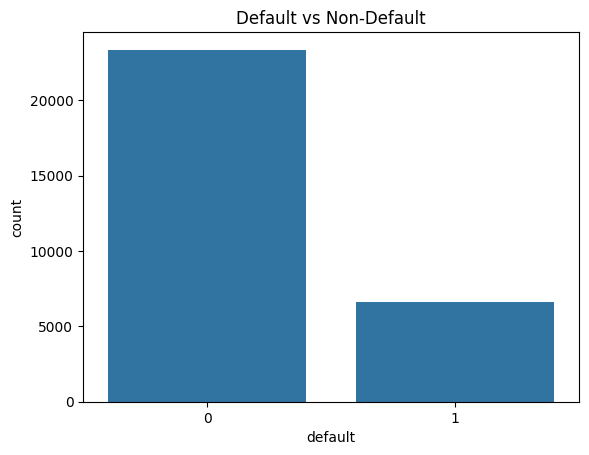

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='default', data=df)
plt.title("Default vs Non-Default")
plt.show()


Credit Limit vs Default

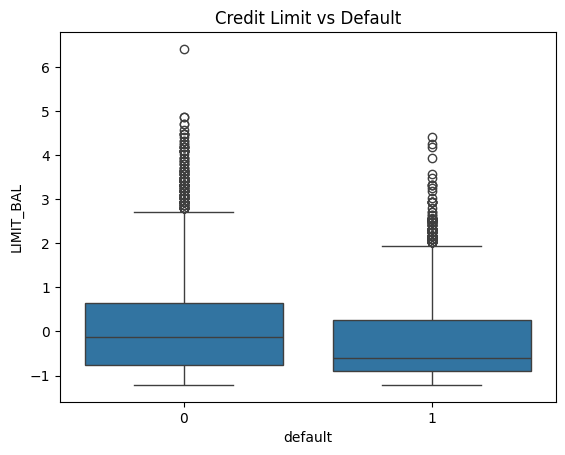

In [20]:
sns.boxplot(x='default', y='LIMIT_BAL', data=df)
plt.title("Credit Limit vs Default")
plt.show()


Repayment Behavior

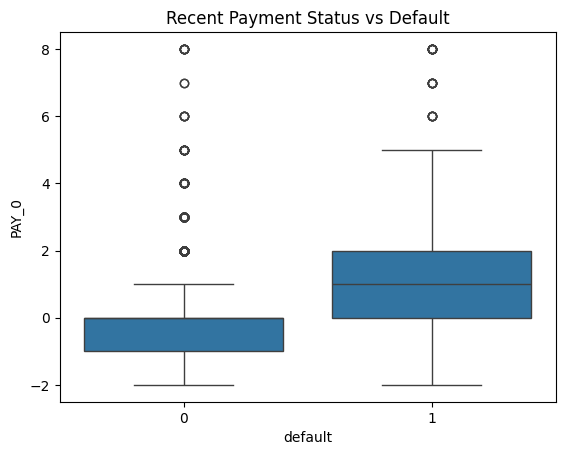

In [21]:
sns.boxplot(x='default', y='PAY_0', data=df)
plt.title("Recent Payment Status vs Default")
plt.show()


MODEL TRAINING

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('default', axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)

lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

MODEL EVALUATION

In [25]:
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


Recall, Precision, F1

In [26]:
from sklearn.metrics import classification_report

print("Logistic Regression\n")
print(classification_report(y_test, y_pred_lr))

print("Random Forest\n")
print(classification_report(y_test, y_pred_rf))


Logistic Regression

              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.62      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000

Random Forest

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.64      0.34      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.67      6000
weighted avg       0.79      0.81      0.79      6000



ROC-AUC

In [27]:
from sklearn.metrics import roc_auc_score

print("LR ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("RF ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


LR ROC-AUC: 0.7083915020485978
RF ROC-AUC: 0.7613953299357482


Confusion Matrix

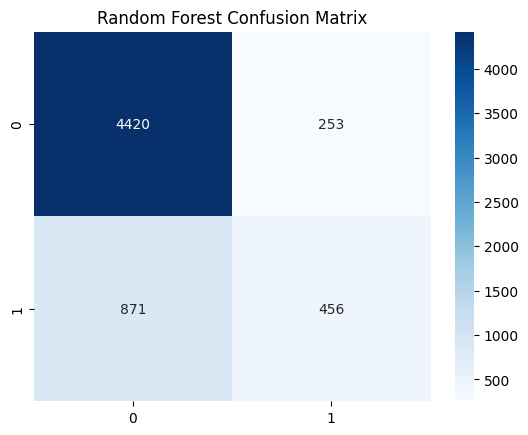

In [28]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()
